In [1]:
import fitsio
import numpy as np
from numpy import savetxt
import Config
import healpy as hp
from astropy.table import Table

In [2]:
file = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/training/'

In [3]:
condFiles = Config.files

validPix = np.full(12*(4096**2), True, dtype = bool)

# This loops over every condition file except for stellar density which has a different format
for i in range(len(condFiles) - 1):
    condData = fitsio.read(condFiles[i]) # This reads in the data
    condSigExt = np.full(12*(4096**2), -1.6375e+30) # Gives a default value
    condSigExt[condData['PIXEL']] = condData['SIGNAL'] # Changes all valid pixels to their corresponding signals
    validPix[np.where(condSigExt < -100)] = False
    
stelDensExt = fitsio.read(condFiles[-1])['I'].flatten() # Loads in the stellar density
validPix[np.where(stelDensExt < -100)] = False
    
PIX_4096 = np.where(validPix)[0]

In [4]:
originalPix = fitsio.read(file + 'Valid_4096_Pixels.fits')['PIXEL']

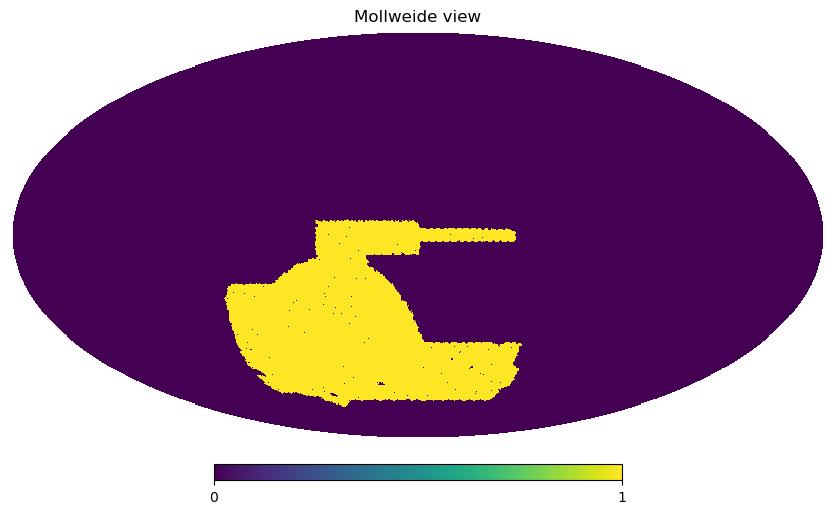

In [19]:
test = np.zeros(12*(4096**2))
test[PIX_4096] = 1
hp.mollview(test, nest = True)

In [24]:
my_table = Table()
my_table['PIXEL'] = PIX_4096
my_table.write(file + 'Valid_4096_Pixels' + '.fits', overwrite = True)